Importing Data and Required Packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#for model training:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
#!pip install catboost
#!pip install xgboost
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [2]:
import os
print(os.getcwd())

c:\Users\sindh\OneDrive\Desktop\Deployement_LEARNING\notebook


In [3]:
import os
current_dir = os.getcwd()
file_path = os.path.join(current_dir, 'stud.csv')


In [4]:
file_path = 'stud.csv'
df = pd.read_csv(file_path)
print(df.head())

   gender race_ethnicity parental_level_of_education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test_preparation_course  math_score  reading_score  writing_score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  


In [5]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
X = df.drop(columns=['math_score'],axis=1)

In [7]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [8]:

# Identify numerical and categorical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

# Create separate DataFrames for numerical and categorical features
numerical_features = df[numerical_columns]
categorical_features = df[categorical_columns]

In [9]:
numerical_features

,math_score,reading_score,writing_score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75
...,...,...,...
995,88,99,95
996,62,55,55
997,59,71,65
998,68,78,77


In [10]:
categorical_features

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course
0,female,group B,bachelor's degree,standard,none
1,female,group C,some college,standard,completed
2,female,group B,master's degree,standard,none
3,male,group A,associate's degree,free/reduced,none
4,male,group C,some college,standard,none
...,...,...,...,...,...
995,female,group E,master's degree,standard,completed
996,male,group C,high school,free/reduced,none
997,female,group C,high school,free/reduced,completed
998,female,group D,some college,standard,completed


In [11]:
for i in categorical_features:
  print("Categorical features in {} Feature:".format(i), end =" ")
  print(df[i].nunique())
  print(df[i].unique())
  print("  ")

Categorical features in gender Feature: 2
['female' 'male']
  
Categorical features in race_ethnicity Feature: 5
['group B' 'group C' 'group A' 'group D' 'group E']
  
Categorical features in parental_level_of_education Feature: 6
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
  
Categorical features in lunch Feature: 2
['standard' 'free/reduced']
  
Categorical features in test_preparation_course Feature: 2
['none' 'completed']
  


In [12]:
y = df['math_score']

In [13]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [15]:
import sklearn
print(sklearn.__version__)

1.2.2


In [16]:
pip install scikit-learn==1.2.2

Note: you may need to restart the kernel to use updated packages.


In [17]:
import sklearn
print(sklearn.__version__)

1.2.2


In [18]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler


from sklearn.compose import ColumnTransformer

num_feature = X.select_dtypes(exclude = 'object').columns
cat_feature = X.select_dtypes(include = 'object').columns
numeric_transformation = StandardScaler()
cat_transformation = OneHotEncoder()
preprocessor = ColumnTransformer([('OneHotEncoder', cat_transformation,num_feature),
                                   ('StandardScaler', numeric_transformation,cat_feature)
                                   ]
                                  )

In [20]:
num_feature = X.select_dtypes(exclude = 'object').columns
cat_feature = X.select_dtypes(include = 'object').columns
numeric_transformation = StandardScaler()
cat_transformation = OneHotEncoder()
preprocessor = ColumnTransformer([('OneHotEncoder', cat_transformation,cat_feature),
                                   ('StandardScaler', numeric_transformation,num_feature)
                                   ]
                                  )

In [21]:
X = preprocessor.fit_transform(X)


In [22]:
X.shape

(1000, 19)

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size =0.2, random_state= 42)
X_train.shape, X_test.shape

((800, 19), (200, 19))

In [24]:
def evaluation_matric_model(true,predcited):
  mae = mean_absolute_error(true,predcited)
  mse = mean_squared_error(true,predcited)
  rmse = np.sqrt(mean_squared_error(true,predcited))
  r2_square = r2_score(true,predcited)
  return mae,mse,rmse,r2_square

In [25]:
models ={"Linear Regression": LinearRegression(),
         "Lasso":Lasso(),
         "Ridge":Ridge(),
         "K-Neighbors Regressor":KNeighborsRegressor(),
         "Decision Tree":DecisionTreeRegressor(),
         "Random Forest Regressor":RandomForestRegressor(),
         "XGBRegressor":XGBRegressor(),
         "CatBoosting Regressor":CatBoostRegressor(verbose=False),
         "AdaBoost Regressor":AdaBoostRegressor()
         }
model_list =[]
r2_list =[]
for i in range(len(list(models))):
  model = list(models.values())[i] #selecting the model from the models specified,ets the current model by index.
  model.fit(X_train,y_train)   #for training
  y_train_pred = model.predict(X_train) #for predicting the trained data
  y_test_pred = model.predict(X_test) #for predicting the test data
  model_train_mae, model_train_mse, model_train_rmse, model_train_r2 = evaluation_matric_model(y_train, y_train_pred)
  model_test_mae, model_test_mse, model_test_rmse,model_test_r2 = evaluation_matric_model(y_test, y_test_pred)
  print(list(models.keys())[i]) #prints the name of the current model for clarity
  model_list.append(list(models.keys())[i]) #dds the model's name to model_list for tracking.

  print("model Performance for Training set")
  print("-Root Mean Squared Error: {:.4f}".format(model_train_rmse))
  print("-meam Absolute Error: {:.4f}".format(model_train_mae))
  print("-R2 Score : {:.4f}".format(model_train_r2))


  print("******************************************************")
  print("model Performance for Test set")
  print("-Root Mean Squared Error: {:.4f}".format(model_test_rmse))
  print("-meam Absolute Error: {:.4f}".format(model_test_mae))
  print("-R2 Score : {:.4f}".format(model_test_r2))
  r2_list.append(model_test_r2)
  print('\n')


Linear Regression
model Performance for Training set
-Root Mean Squared Error: 5.3293
-meam Absolute Error: 4.2715
-R2 Score : 0.8740
******************************************************
model Performance for Test set
-Root Mean Squared Error: 5.4252
-meam Absolute Error: 4.2222
-R2 Score : 0.8790


Lasso
model Performance for Training set
-Root Mean Squared Error: 6.5938
-meam Absolute Error: 5.2063
-R2 Score : 0.8071
******************************************************
model Performance for Test set
-Root Mean Squared Error: 6.5197
-meam Absolute Error: 5.1579
-R2 Score : 0.8253


Ridge
model Performance for Training set
-Root Mean Squared Error: 5.3233
-meam Absolute Error: 4.2650
-R2 Score : 0.8743
******************************************************
model Performance for Test set
-Root Mean Squared Error: 5.3904
-meam Absolute Error: 4.2111
-R2 Score : 0.8806


K-Neighbors Regressor
model Performance for Training set
-Root Mean Squared Error: 5.7079
-meam Absolute Error: 4.5

In [27]:
Results = pd.DataFrame(list(zip(model_list,r2_list)),columns = ['Model Name','R2_Score']).sort_values(by=["R2_Score"],ascending=False)

In [28]:
Results

,Model Name,R2_Score
2,Ridge,0.880593
0,Linear Regression,0.879046
8,AdaBoost Regressor,0.852928
7,CatBoosting Regressor,0.851632
5,Random Forest Regressor,0.847761
6,XGBRegressor,0.827797
1,Lasso,0.825320
3,K-Neighbors Regressor,0.783813
4,Decision Tree,0.732903


In [29]:
Linear_model = LinearRegression(fit_intercept = True)
Linear_model = Linear_model.fit(X_train, y_train)
y_pred = Linear_model.predict(X_test)
Score = r2_score(y_test, y_pred)*100
print("Accuracy of the linear model is %.2f" %Score)

Accuracy of the linear model is 87.90


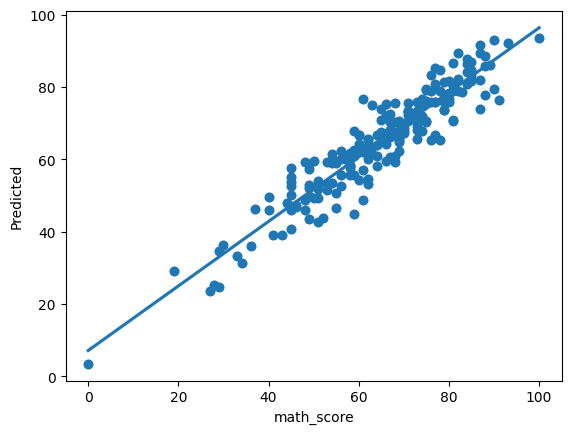

In [30]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel('Predicted')
sns.regplot(x=y_test,y=y_pred,ci=None);


In [31]:
Prediction_diff = pd.DataFrame({'Actual Value': y_test,'Pred': y_pred, 'Difference': y_test-y_pred})
Prediction_diff

,Actual Value,Pred,Difference
521,91,76.4375,14.5625
737,53,59.3125,-6.3125
740,80,76.6250,3.3750
660,74,76.5625,-2.5625
411,84,87.7500,-3.7500
...,...,...,...
408,52,43.6875,8.3125
332,62,62.3125,-0.3125
208,74,67.7500,6.2500
613,65,67.0000,-2.0000
